In [20]:
# PLOTS THE NIRISS BACKGROUND MODELS FROM EACH PIPELINE
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

sys.path.append('./scripts')
from utils import load_plt_params

# set the matplotlib parameters
_=load_plt_params()

In [21]:
plt.rcParams['font.size'] = 10

/var/folders/9s/jb487nv52hs8n0q5ftmb1lk80000gn/T/ipykernel_5528/464142277.py:78: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(right=0.8, hspace=0.4)
/var/folders/9s/jb487nv52hs8n0q5ftmb1lk80000gn/T/ipykernel_5528/464142277.py:94: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('/Users/belugawhale/Documents/niriss_real/wasp39/nature_submission/edfigure2.jpg', #transparent=True,


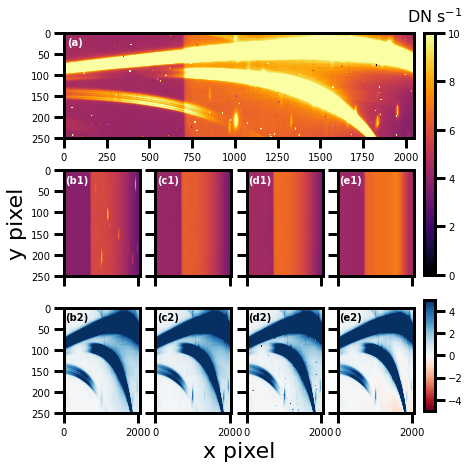

In [22]:
# setting up the figure
fig = plt.figure(constrained_layout=True, 
                 figsize=(7.20472, 7))
fig.set_facecolor('w')

gs = GridSpec(3,4, figure=fig, hspace=0.3)

# adding all the subplots
ax_main = fig.add_subplot(gs[0,:])
e1 = fig.add_subplot(gs[1,0])
e2 = fig.add_subplot(gs[2,0])

a1 = fig.add_subplot(gs[1,1])
a2 = fig.add_subplot(gs[2,1])

s1 = fig.add_subplot(gs[1,2])
s2 = fig.add_subplot(gs[2,2])

l1 = fig.add_subplot(gs[1,3])
l2 = fig.add_subplot(gs[2,3])

vmin, vmax = 0, 10
textx, texty = 40, 30
cmap1 = 'inferno' # sets one colormap
cmap2 = 'RdBu'    # sets the other colormap

med = np.load('./data/bkgs/medframe.npy', allow_pickle=True)

# plots the main image
im = ax_main.imshow(med, vmin=vmin, vmax=vmax, aspect='auto', cmap=cmap1)
ax_main.text(s='(a)', x=20, y=texty, zorder=10, color='w', fontweight='bold')

labels = ['ADF', 'LPC', 'NE', 'AT']
axes1 = [e1, a1, s1, l1]
axes2 = [e2, a2, s2, l2]
letters = ['b', 'c', 'd', 'e', 'f']

for n in range(len(labels)):

    if labels[n] == 'MCR':
        factor=45
    else:
        factor=1

    if labels[n] == 'NE' or labels[n] == 'AT':
        idx = [1, 0]
    else:
        idx = [0, 1]


    dat = np.load('./data/bkgs/{}_bkg_and_medframe.npy'.format(labels[n]),
                  allow_pickle=True)

    axes1[n].imshow(dat[idx[0]]/factor, aspect='auto', vmin=vmin, vmax=vmax,
                    cmap=cmap1)

    im2 = axes2[n].imshow(dat[idx[1]], aspect='auto', vmin=-5, vmax=5,
                          cmap=cmap2)

    # label the subplots
    axes1[n].text(s='({}1)'.format(letters[n]),
            x=textx, y=texty, zorder=10, color='w', fontweight='bold')

    axes2[n].text(s='({}2)'.format(letters[n]),
                x=textx, y=texty, zorder=10, fontweight='bold')

# make all the xlims and ylims the same
for ax in [ax_main, a1, a2, s1, s2, e1, e2, l1, l2]:
    ax.set_ylim(250,0)
    ax.set_xlim(0,2048)

# remove tick labels
for ax in [a1, a2, s1, s2, l1, l2]:
    ax.set_yticklabels([])
for ax in [e1, a1, s1, l1]:
    ax.set_xticklabels([])

fig.subplots_adjust(right=0.8, hspace=0.4)

# create colorbar 1
cbar_ax = fig.add_axes([0.82, 0.4, 0.02, 0.48])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_title('DN s$^{-1}$', y=1.02, x=1, fontsize=16)

# create colorbar 2
cbar_ax2 = fig.add_axes([0.82, 0.13, 0.02, 0.22])
cbar2 = fig.colorbar(im2, cax=cbar_ax2)

# setting axes labels
e1.set_ylabel('y pixel', fontsize=22)
a2.set_xlabel('x pixel', fontsize=22, x=1.1)


plt.savefig('/Users/belugawhale/Documents/niriss_real/wasp39/nature_submission/edfigure2.jpg', #transparent=True,
            rasterize=True, bbox_inches='tight', dpi=250)
